In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install deepface

In [5]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.2.2 which is incompatible.


In [6]:
!pip install mediapipe

In [7]:
!pip install ultralytics

In [8]:
!pip uninstall tensorflow
!pip install tensorflow==2.12


Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.12.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the pa

In [1]:
from deepface import DeepFace
import time
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [4]:
DATABASE_PATH = "/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/db"

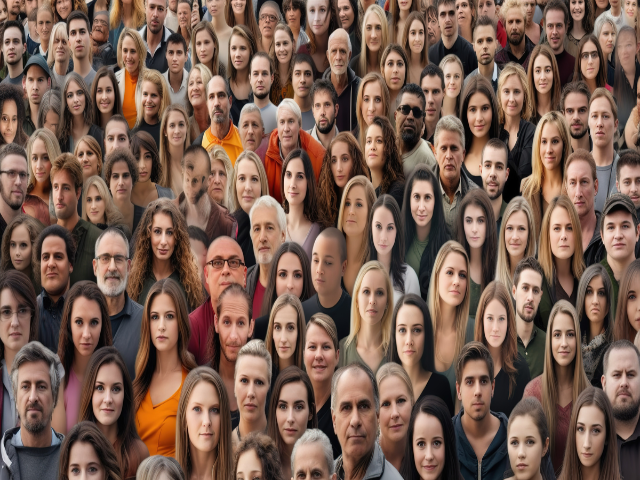

In [19]:
img_path = "/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/face_images/face_image_2.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (640, 480))
cv2_imshow(image)

In [20]:
from collections import Counter
img_path = "/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/face_images/face_image_2.jpg"
img_path = cv2.resize(image, (640, 480))
face_detector_models = [ "opencv", "ssd", "mtcnn", "fastmtcnn", "retinaface", "mediapipe", "yunet", "centerface" ,"yolov8", "dlib"]


results = []

for detector_model in face_detector_models:

    start_time = time.time()
    result = DeepFace.extract_faces(img_path=img_path,
                                    detector_backend=detector_model,
                                    enforce_detection = False
                                    )
    end_time = time.time()

    # Speed
    speed = end_time - start_time

    # Performance
    num_detected_faces = len(result) if result is not None else 0
    total_faces = 138.0
    performance = num_detected_faces / total_faces


    results.append({
        "detector_model": detector_model,
        "speed": speed,
        "performance": performance,
    })




22/22 [==============================] - 1s 32ms/step


In [15]:

def find_best_model(results, metric, label):

    if metric == "speed":
        sorted_results = sorted(results, key=lambda x: x["speed"])
    else:
        sorted_results = sorted(results, key=lambda x: (-x["performance"], x["speed"]))

    best_model = sorted_results[0]

    print("Best Model based on {}:".format(metric.capitalize()))
    print("--------------------------")
    if label == "detector_model" : print("Detector Model:", best_model["detector_model"])
    if label == "recognition_model" : print("Recogniton Model:", best_model["recognition_model"])
    print("Performance:", best_model["performance"])
    print("Speed:", best_model["speed"], "seconds")




In [22]:
find_best_model(results, "speed", "detector_model")
print("\n******************************************")
find_best_model(results, "performance","detector_model")

Best Model based on Speed:
--------------------------
Detector Model: mediapipe
Performance: 0.007246376811594203
Speed: 0.008026361465454102 seconds

******************************************
Best Model based on Performance:
--------------------------
Detector Model: yolov8
Performance: 0.8840579710144928
Speed: 1.0034067630767822 seconds


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_performance_vs_speed(results, label):
    plt.figure(figsize=(10, 6))
    for res in results:
        performance = res["performance"]
        plt.scatter(res["speed"], performance, label=res[label])
        plt.text(res["speed"] + 0.001, performance, res[label], fontsize=8)

    plt.xlabel('Speed (seconds)')
    plt.ylabel('Performance')
    if label == "detector_model": plt.title('Face Detection Performance vs Speed for Different Detector Models')
    if label == "recognition_model": plt.title('Face Recognition Performance vs Speed for Different Recognition Models')
    plt.grid(True)
    plt.legend()
    plt.show()


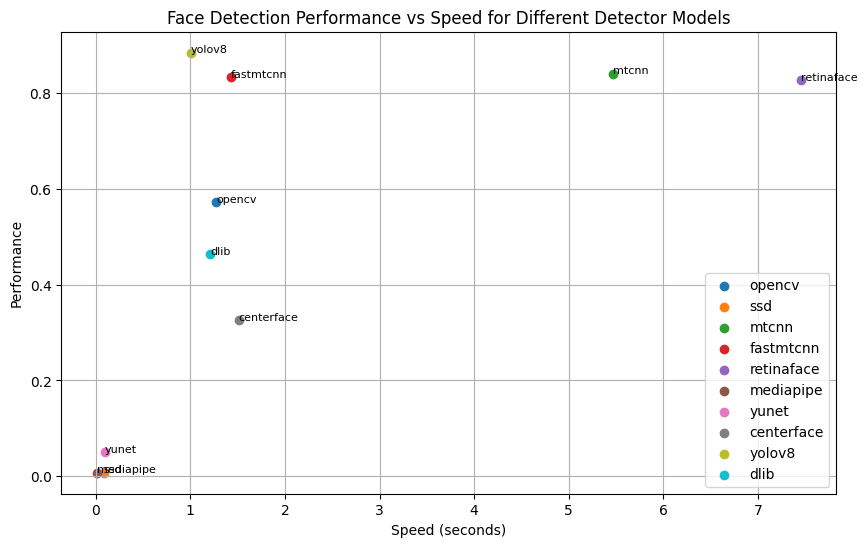

In [24]:
plot_performance_vs_speed(results, label = "detector_model")

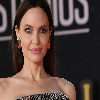

In [8]:
img_path = "/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/face_images/ang.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (100,100))
cv2_imshow(image)

In [5]:
import os
db_images = {}

for root, dirs, files in os.walk(DATABASE_PATH):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            person_name = os.path.basename(root)
            if person_name not in db_images:
                db_images[person_name] = []
            db_images[person_name].append(os.path.join(root, file))



In [6]:
for person_name, images in db_images.items():
    for image in images:
        print(image)

/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/db/angelina/angelina1.jpeg
/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/db/angelina/angelina2.jpeg
/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/db/angelina/angelina3.jpeg
/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/db/bradpitt/brad2.jpeg
/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/db/bradpitt/brad1.jpg


In [17]:
from collections import Counter
import time
import cv2

img_path = "/content/drive/MyDrive/Colab Notebooks/BachelorArbeit/face_images/ang.jpg"
img_path = cv2.imread(img_path)
img_path = cv2.resize(img_path, (200,200))
face_recognition_models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace","DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet"]

results = []

for recogntion_model in face_recognition_models:
    start_time = time.time()
    distance = 1.0
    for person_name, images in db_images.items():
        for image_path in images:
            result = DeepFace.verify(img_path, image_path,
                                     model_name=recogntion_model,
                                     enforce_detection=False)
            if result['verified']:
              #end_time = time.time()
              if result['distance'] < distance : distance = result['distance']


    end_time = time.time()
    performance = 1.0 - distance

    speed = end_time - start_time

    results.append({
        "recognition_model": recogntion_model,
        "performance": performance,
        "speed": speed,
    })

print(results)


[{'recognition_model': 'VGG-Face', 'performance': 0.5625047330353239, 'speed': 7.7107720375061035}, {'recognition_model': 'Facenet', 'performance': 0.6903903367065702, 'speed': 6.695626258850098}, {'recognition_model': 'Facenet512', 'performance': 0.0, 'speed': 5.156883239746094}, {'recognition_model': 'OpenFace', 'performance': 0.0, 'speed': 2.981830596923828}, {'recognition_model': 'DeepFace', 'performance': 0.844378550507222, 'speed': 23.33200693130493}, {'recognition_model': 'DeepID', 'performance': 0.0, 'speed': 2.0568761825561523}, {'recognition_model': 'ArcFace', 'performance': 0.40538564980110947, 'speed': 5.547966480255127}, {'recognition_model': 'Dlib', 'performance': 0.9400793758080058, 'speed': 3.0640525817871094}, {'recognition_model': 'SFace', 'performance': 0.5007282703943765, 'speed': 2.2771706581115723}, {'recognition_model': 'GhostFaceNet', 'performance': 0.5852397639132338, 'speed': 4.503229141235352}]


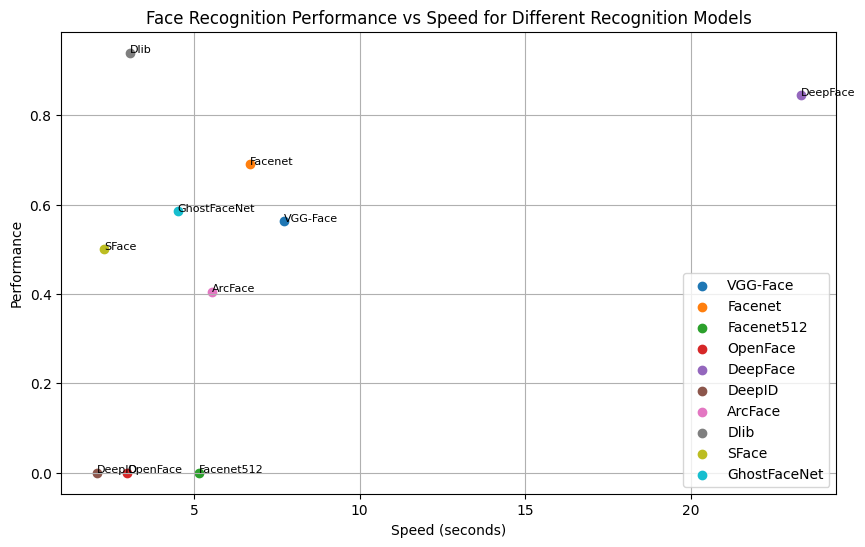

In [18]:
plot_performance_vs_speed(results, label = "recognition_model")

In [19]:
find_best_model(results, "speed", "recognition_model")
print("\n******************************************")
find_best_model(results, "performance","recognition_model")

Best Model based on Speed:
--------------------------
Recogniton Model: DeepID
Performance: 0.0
Speed: 2.0568761825561523 seconds

******************************************
Best Model based on Performance:
--------------------------
Recogniton Model: Dlib
Performance: 0.9400793758080058
Speed: 3.0640525817871094 seconds
